## Bering NCEP/NCAR Reanalysis MSLP data for Bering Sea region

In [3]:
%matplotlib inline

In [4]:
#using xarray for data read
import xarray as xa
from netCDF4 import num2date
import numpy as np

#using Cartopy for mapping
import matplotlib.pyplot as plt
import cmocean

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io import shapereader
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

def make_map(projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(figsize=(13, 8),
                           subplot_kw=dict(projection=projection))
    gl = ax.gridlines(draw_labels=True)
    gl.xlabels_top = gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    return fig, ax

land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='1.0')

/Volumes/WDC_internal/Users/bell/anaconda2/lib/python2.7/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


Gather data from ESRL THREDDS server for Reanalysis II mslp data

NCEP/DOE 2 Reanalysis data provided by the NOAA/OAR/ESRL PSD, Boulder, Colorado, USA, from their Web site at http://www.esrl.noaa.gov/psd/ 

In [5]:
# mslp
threddspath='https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis2.dailyavgs/surface/'

tfile = 'mslp.1979.nc'

The mask/scale function didn't work on readin of the esrl file... error is that \_Fillvalue and missing_value are different.  scale must be applied independantly or missing value should be properly set

In [6]:
### list of doy groupings for 8 day averages
doy_start = [335,343,351,359,2,10,18,26]
doy_end = [342,350,358,1,9,17,25,33]

<xarray.DataArray 'mslp' (time: 7, lat: 8, lon: 11)>
array([[[ -8956,  -8939, ...,  -9121,  -9151],
        [ -9234,  -9261, ..., -10024, -10079],
        ..., 
        [-12586, -12994, ..., -14396, -14296],
        [-11744, -12154, ..., -13819, -13769]],

       [[ -8901,  -8949, ...,  -9941, -10019],
        [ -9119,  -9226, ..., -10861, -10934],
        ..., 
        [-10801, -11044, ..., -13389, -13326],
        [-10524, -10821, ..., -13159, -13016]],

       ..., 
       [[ -6676,  -6786, ...,  -7026,  -7034],
        [ -6586,  -6636, ...,  -6764,  -6874],
        ..., 
        [ -9146,  -8739, ...,  -7094,  -7204],
        [ -9364,  -9129, ...,  -7559,  -7646]],

       [[ -6526,  -6601, ...,  -6764,  -6764],
        [ -6521,  -6546, ...,  -6479,  -6491],
        ..., 
        [ -8726,  -8549, ...,  -7666,  -7874],
        [ -8921,  -8819, ...,  -8146,  -8251]]], dtype=int16)
Coordinates:
  * lat      (lat) float32 72.5 70.0 67.5 65.0 62.5 60.0 57.5 55.0
  * lon      (lon) float3

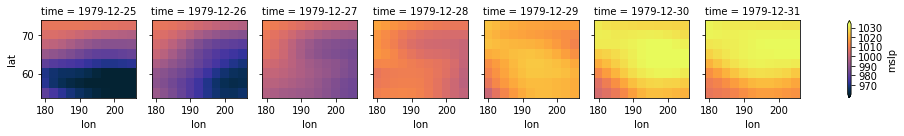

In [8]:
cmap = cmocean.cm.thermal
with xa.open_dataset(threddspath+tfile, concat_characters=True, mask_and_scale=False, decode_times=True, decode_coords=True, drop_variables=None) as xdf:
    pd = xdf.isel(time=slice(-7,None),lat=slice(7,15),lon=slice(72,83))
    pd =xa.decode_cf(pd,mask_and_scale=False,decode_times=True)
    facet = ((pd['mslp']+pd.mslp.add_offset)/100.).plot(x='lon', y='lat', col='time',col_wrap=7,robust=True,figsize=(14,2),cmap=cmap)

In [6]:
xdf = xa.open_dataset(threddspath+tfile, decode_cf=False)

pd = xdf.isel(time=slice(335,342+1),lat=slice(7,15),lon=slice(72,83))

In [7]:
#map to cf conventions
pd =xa.decode_cf(pd,mask_and_scale=False,decode_times=True)

In [8]:
pd['mslp'] = (pd['mslp']+pd.mslp.add_offset)/100.
eightday = pd.groupby(pd['time.dayofyear']).mean('time')
eightdayave = eightday.mslp.mean('dayofyear')

reshaping the gridded data (lat: 8, lon:11) -> lon1,lat1;lon1,lat2;lon1,lat3...

In [9]:
size = 1
for dim in np.shape(eightdayave): size *= dim

f_handle = file('tmp.txt', 'a')
np.savetxt(f_handle, eightdayave.data.reshape(1,size),fmt='%4.2f',delimiter=',')
f_handle.close()


In [10]:
print eightdayave.lon.data

[ 180.   182.5  185.   187.5  190.   192.5  195.   197.5  200.   202.5
  205. ]


In [11]:
print eightdayave.lat.data

[ 72.5  70.   67.5  65.   62.5  60.   57.5  55. ]


In [12]:
np.shape(eightdayave)

(8, 11)

In [13]:
(eightdayave)

<xarray.DataArray 'mslp' (lat: 8, lon: 11)>
array([[ 1002.924988,  1002.783752,  1002.748718,  1002.828796,  1002.95752 ,
         1003.127502,  1003.311279,  1003.530029,  1003.793701,  1004.077515,
         1004.438721],
       [ 1005.361206,  1004.595032,  1004.10376 ,  1003.8125  ,  1003.664917,
         1003.569946,  1003.519958,  1003.516235,  1003.657471,  1003.953735,
         1004.356262],
       [ 1007.231201,  1005.966248,  1004.984924,  1004.308777,  1003.84375 ,
         1003.463745,  1003.118835,  1002.985046,  1003.184998,  1003.733765,
         1004.528809],
       [ 1007.03125 ,  1005.266296,  1004.001221,  1003.121216,  1002.389954,
         1001.79248 ,  1001.506287,  1001.744934,  1002.614929,  1003.943787,
         1005.35498 ],
       [ 1005.652466,  1004.272461,  1003.208801,  1002.301208,  1001.46875 ,
         1000.967468,  1001.103821,  1002.087463,  1003.803772,  1005.744995,
         1007.267456],
       [ 1005.078674,  1004.433777,  1003.876221,  1003.35998

In [14]:
eightdayave.data.reshape(1,88)

array([[ 1002.92498779,  1002.78375244,  1002.74871826,  1002.82879639,
         1002.95751953,  1003.12750244,  1003.3112793 ,  1003.5300293 ,
         1003.79370117,  1004.07751465,  1004.4387207 ,  1005.36120605,
         1004.59503174,  1004.10375977,  1003.8125    ,  1003.66491699,
         1003.56994629,  1003.5199585 ,  1003.51623535,  1003.6574707 ,
         1003.95373535,  1004.35626221,  1007.23120117,  1005.96624756,
         1004.98492432,  1004.30877686,  1003.84375   ,  1003.46374512,
         1003.11883545,  1002.98504639,  1003.18499756,  1003.73376465,
         1004.52880859,  1007.03125   ,  1005.26629639,  1004.0012207 ,
         1003.12121582,  1002.38995361,  1001.79248047,  1001.50628662,
         1001.74493408,  1002.6149292 ,  1003.94378662,  1005.35498047,
         1005.65246582,  1004.27246094,  1003.20880127,  1002.3012085 ,
         1001.46875   ,  1000.96746826,  1001.1038208 ,  1002.08746338,
         1003.80377197,  1005.74499512,  1007.26745605,  1005.07